# EDA
## Автор Майя Котыга

In [ ]:
# @title Загрузка библиотек
import gdown
import pandas as pd
import numpy as np
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# @title Чтение данных
url = 'https://drive.google.com/uc?id=1P1BsvI2jPN3fEqjc2YZxmQ-MTs22WVUk'
output = 'file.csv'

gdown.download(url, output, quiet=False)

data = pd.read_csv('file.csv')

stop_words = set(stopwords.words('english'))

Downloading...
From (original): https://drive.google.com/uc?id=1P1BsvI2jPN3fEqjc2YZxmQ-MTs22WVUk
From (redirected): https://drive.google.com/uc?id=1P1BsvI2jPN3fEqjc2YZxmQ-MTs22WVUk&confirm=t&uuid=9b10680a-2ac4-449c-9686-ea1a47ebc560
To: /content/file.csv
100%|██████████| 672M/672M [00:07<00:00, 89.0MB/s]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14634 entries, 0 to 14633
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   14634 non-null  int64  
 1   Name         14634 non-null  object 
 2   WikiData     12078 non-null  object 
 3   City         14634 non-null  object 
 4   Lon          14634 non-null  float64
 5   Lat          14634 non-null  float64
 6   description  12078 non-null  object 
 7   image        14634 non-null  object 
 8   en_txt       14634 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.0+ MB


In [ ]:
data.duplicated(['image']).sum()

1353

In [ ]:
data.describe(include='object')

,Name,WikiData,City,description,image,en_txt
count,14634,12078,14634,12078,14634,14634
unique,387,296,4,245,13281,10154
top,Владимир,Q4516884,Ярославль,Православный храм в Ярославле,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAICAgICAQICAg...,arafed view of a large white building with gol...
freq,114,123,4372,605,10,83


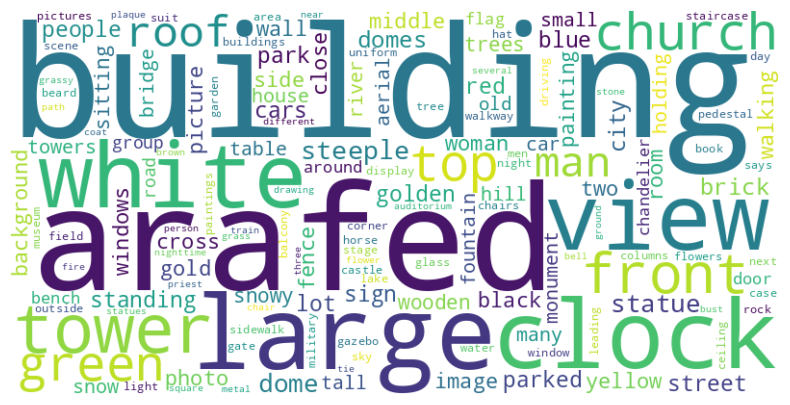

In [ ]:
corpus = data.en_txt

vectorizer = TfidfVectorizer(stop_words=list(stop_words))
tfidf_matrix = vectorizer.fit_transform(corpus)

feature_names = vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1

df_tfidf = pd.DataFrame({'word': feature_names, 'tfidf': tfidf_scores})

top_n = df_tfidf.nlargest(150, 'tfidf')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(top_n['word'], top_n['tfidf'])))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Preparation
## Автор Юрий Самородов

In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [ ]:
def extract_urban_cultural_descriptions(dataframe):
    # Comprehensive list of relevant keywords
    relevant_keywords = [
        # Buildings and Architecture
        'building', 'architecture', 'facade', 'structure', 'design',
        'construction', 'edifice', 'monument', 'landmark', 'tower',
        'cathedral', 'palace', 'castle', 'church', 'bridge',

        # Cities and Urban Landscape
        'city', 'urban', 'street', 'avenue', 'square', 'district',
        'neighborhood', 'skyline', 'cityscape', 'downtown', 'urban center',

        # Cultural and Artistic Elements
        'museum', 'gallery', 'art', 'culture', 'heritage', 'historical',
        'exhibition', 'artwork', 'sculpture', 'cultural', 'Exhibition',
        'artifact', 'monument', 'architectural style',

        # Views and Scenery
        'view', 'panorama', 'landscape', 'scenery', 'vista', 'perspective',

        # Architectural Descriptors
        'historic', 'modern', 'classical', 'contemporary', 'traditional',
        'baroque', 'gothic', 'renaissance', 'exterior', 'interior'
    ]

        # Expanded noise keywords
    noise_keywords = [
        '''
        # General Terms
        'the',
        'and',
        'of',
        'in',
        'to',
        'for',
        'with',
        'at',
        '''

        # Advertising and Marketing Terms
        'ad',
        'advertisement',
        'promo',
        'promotion',
        'sale',
        'discount',
        'offer',

        # Social Media and Selfie-related Terms
        "selfie",
        "photo",
        "picture",
        "snap",
        "post",
        "share",
        "like",

        # Animal-related Terms
        "dog",
        "cat",
        "pet",
        "animal",
        "wildlife",
        "zoo",

       # Non-specific Activities
       "visit",
       "see",
       "go",
       "explore",

       # Vague Descriptors
       "nice",
       "great",
       "best",
       "interesting",
       "unique",

       # Event-related Terms
       "event",
       "festival",

       # Miscellaneous Non-Cultural Terms
       # Food and Drink
       "food",
       "drink",
       "restaurant",
       "cafe",

       # Travel and Tourism
       "tourist",
       "tourism",
       "vacation",

       # Entertainment
       "movie",
       "concert",
       "show"

       #People
        "lad",
        "man",
        "men",
        "woman",
        "women",

    ]


    def is_urban_cultural_description(text):
        # Convert to lowercase
        text_lower = text.lower()

        # Check for relevant keywords
        keyword_match = any(keyword in text_lower for keyword in relevant_keywords)

        # Check for noise keywords
        noise_match = any(noise in text_lower for noise in noise_keywords)


        # Additional criteria
        is_descriptive = (
            len(text_lower.split()) > 5 and  # More than 5 words
            len(text_lower.split()) < 50 and  # Less than 50 words
            not re.search(r'\bthere (is|are)\b', text_lower) and # Avoid generic descriptions
            not noise_match # Avoid descriptions with noise keywords
        )

        return keyword_match and is_descriptive

    # Filter the dataframe
    urban_cultural_texts = dataframe[
        dataframe['en_txt'].apply(
            lambda x: is_urban_cultural_description(x) if isinstance(x, str) else False
        )
    ]

    return {
        'relevant_entries': urban_cultural_texts,
        'relevant_descriptions': urban_cultural_texts['en_txt'].tolist(),
        'relevant_count': len(urban_cultural_texts)
    }

In [ ]:
# Extract urban and cultural descriptions
result = extract_urban_cultural_descriptions(data)

In [ ]:
df = result['relevant_entries']

# Обогащение лейблами
## Автор Семён Квасенко

In [ ]:
pattern = r'[-+]?d*.d+'

for i in range(len(df)):
    # Удаление всех найденных значений
    cleaned_text = re.sub(pattern, '', df['description'].iloc[i])
    # Удаление лишних пробелов
    cleaned_text = re.sub(r's+', ' ', cleaned_text).strip()

In [ ]:
categories = {
    'Спортивное сооружение': ['спорткомплекс', 'стадион'],
    'Усадьба': ['дом', 'усадьба', 'особняк', 'домик'],
    'Храм/Церковь': ['церковь', 'монастырь', 'храм', 'собор', 'часовня', 'мечеть', 'приход'],
    'Музей': ['музей', 'дом-музей', 'музеев', 'музей-квартира', 'музей-заповедник'],
    'Театры и кинотеатры': ['кинотеатр', 'концертный', 'театр', 'цирк'],
    'Парки и сады': ['парк', 'сад'],
    'Военное учреждение': ['военно-учебное', 'штаба'],
    'Памятник': ['памятник', 'мемориал', 'памятники', 'монумент', 'вечный огонь', 'курганы'],
    'Учебное заведение': ['учебное', 'училище', 'университет', 'университета', 'лицей', 'образования', 'школа', 'колледж', 'гимназии', 'образовательное', 'семинария'],
    'Площадь/улица': ['площадь', 'улица', 'центр'],
    'Город/Поселок': ['посёлок', 'острог'],
    'Библиотека': ['библиотека'],
    'Банк': ['банк'],
    'Тюрьма': ['тюрьма'],
    'Завод': ['завод'],
    'Башня': ['башня', 'столп'],
    'Историческая личность': ['поэт', 'публицист', 'литературовед'],
    'Кладбище': ['кладбище', 'некрополь']

}

In [ ]:
# Функция для классификации
def categorize(description):
    description = description.lower()  # Приводим к нижнему регистру
    for category, keywords in categories.items():
        if any(keyword in description for keyword in keywords):
            return category
    return 'Историческое сооружение'  # Если категория не найдена

# Применяем функцию к описанию
df['category'] = df['description'].apply(categorize)

<ipython-input-13-e18e6ce0fe36>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['description'].apply(categorize)


In [ ]:
df.groupby('category').count()['Name']

,Name
category,
Банк,46
Башня,379
Библиотека,10
Военное учреждение,23
Город/Поселок,32
Завод,10
Историческая личность,1
Историческое сооружение,777
Кладбище,29


In [ ]:
df.head()

,Unnamed: 0,Name,WikiData,City,Lon,Lat,description,image,en_txt,category
1,1,Динамо,Q37996725,Екатеринбург,60.600349,56.845398,спорткомплекс в Екатеринбурге,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,arafed building with a blue and white exterior...,Спортивное сооружение
6,6,Динамо,Q37996725,Екатеринбург,60.600349,56.845398,спорткомплекс в Екатеринбурге,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,aerial view of a city with a soccer field and ...,Спортивное сооружение
7,7,Динамо,Q37996725,Екатеринбург,60.600349,56.845398,спорткомплекс в Екатеринбурге,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,a view of a building with a clock tower on top...,Спортивное сооружение
8,8,Динамо,Q37996725,Екатеринбург,60.600349,56.845398,спорткомплекс в Екатеринбурге,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,arafed building with a blue and white sign on it,Спортивное сооружение
9,9,Динамо,Q37996725,Екатеринбург,60.600349,56.845398,спорткомплекс в Екатеринбурге,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAUEBAUEAwUFBA...,arafed building with a blue and white sign on ...,Спортивное сооружение


In [ ]:
df.iloc[:, 1:].to_csv('hack.csv', index=False)